<a href="https://colab.research.google.com/github/Mithaamalia13/PA_KB_5_A2-20/blob/main/KONSUL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TEMA     : KLASIFIKASI KUALITAS LEMON🍋**
---
# **KELOMPOK : 5 A2**
1.   **2009106026 SULHAIRAH**
2.   **2009106028 MITHA AMALIA**
3.   **2009106030 PATRICIA CHANDRA**






# **IMPORT LIBRARY**

In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from sklearn import preprocessing
from pathlib import Path

# **DATA COLECTING**

### Load Data dari GDrive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Folder Tempat Menyimpan Dataset

In [3]:
basePath = "/content/drive/MyDrive/dataset_PA/lemon"

### Menampilkan Jumlah Gambar di dalam folder

#### Menampilkan Gambar

In [4]:
images = {}

for dirname, dirlist, filenames in os.walk(basePath):
    orange_state = dirname.split('/')[-1]
    if dirname != basePath and orange_state in ['good_quality', 'bad_quality']:
        print(f"Number of {orange_state} images: {len(filenames)}")
        filePaths = []
        for filename in filenames:
            filePaths.append(os.path.join(basePath, dirname, filename))
        images[orange_state] = filePaths

Number of bad_quality images: 951
Number of good_quality images: 1125


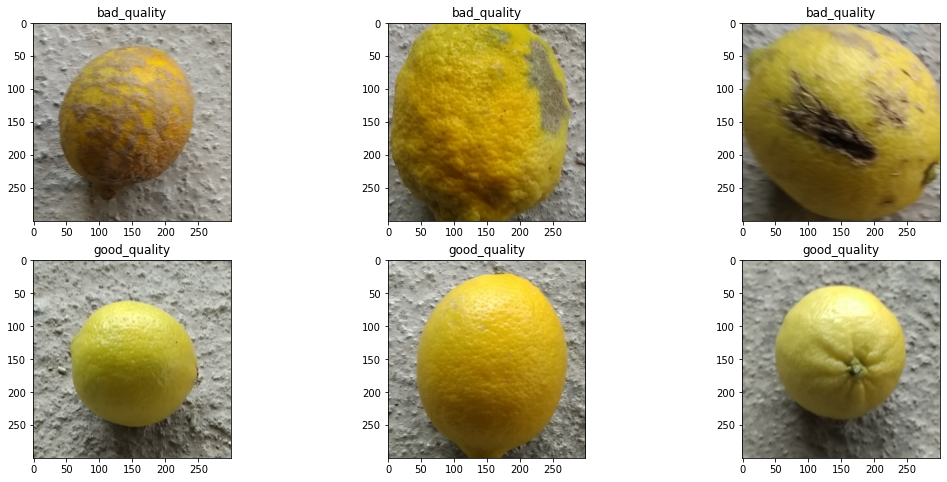

In [5]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

for i in range(6):
    img1 = cv2.imread(images[list(images.keys())[i//3]][i%3])
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    ax[i//3][i%3].imshow(img1)
    ax[i//3][i%3].set_title(list(images.keys())[i//3])

plt.show()

#### Menampilkan Ukuran Gambar

In [6]:
bad_img = cv2.imread('/content/drive/MyDrive/dataset_PA/lemon/bad_quality/bad_quality_0.jpg')
good_img = cv2.imread('/content/drive/MyDrive/dataset_PA/lemon/good_quality/good_quality_0.jpg')

In [7]:
print('Ukuran dari gambar lemon kualitas jelek : ',bad_img.shape)
print('Ukuran dari gambar lemon kualitas bagus : ',good_img.shape)

Ukuran dari gambar lemon kualitas jelek :  (300, 300, 3)
Ukuran dari gambar lemon kualitas bagus :  (300, 300, 3)


### Buat Folder Untuk menyimpan Split Folder Dataset

In [8]:
# %mkdir /content/drive/MyDrive/Data/

mkdir: cannot create directory ‘/content/drive/MyDrive/Data/’: File exists


### SPLIT FOLDER

In [9]:
# !pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
# import splitfolders

### Split Data dengan Ratio 70% Train, 20% Validation, 10% Test

In [11]:
# splitfolders.ratio(
#     basePath,
#     output='Data',
#     ratio=(.7,.20,.10)
# )

Copying files: 2076 files [00:49, 42.29 files/s] 


# **DATA PROCESSING**

In [12]:
from keras_preprocessing.image import ImageDataGenerator
TRAINING_DIR = "/content/drive/MyDrive/Data/train"
TEST_DIR = "/content/drive/MyDrive/Data/test"
VAL_DIR = "/content/drive/MyDrive/Data/val"

training_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range = 40,
    brightness_range = (0.5,1.5),
    zoom_range = 0.2,
    fill_mode = 'nearest',
    # preprocessing_function=random_brightness
)

test = ImageDataGenerator(
    rescale = 1./255,)

print('Traning Generator: ', end="")
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    #merubah ke dimensi 150,150
    target_size=(150, 150),
    batch_size=64,
    class_mode = 'binary')

print('Validation Generator: ', end="")
validation_generator = test.flow_from_directory(
    VAL_DIR, 
    target_size=(150, 150),
    batch_size=64,
    class_mode = 'binary') 


print('Test Generator: ', end="")
test_generator = test.flow_from_directory(
    TEST_DIR, 
    target_size=(150, 150),
    batch_size=64,
    class_mode = 'binary') 

Traning Generator: Found 1452 images belonging to 2 classes.
Validation Generator: Found 415 images belonging to 2 classes.
Test Generator: Found 314 images belonging to 2 classes.


In [13]:
# def random_brightness(image):
#     return tf.image.random_brightness(image, max_delta=0.5)

In [15]:
labels = ['good_quality','bad_quality']

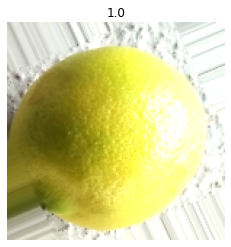

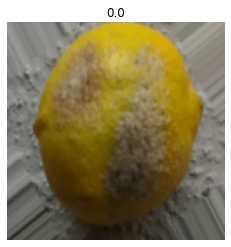

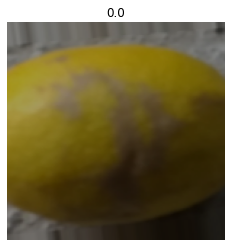

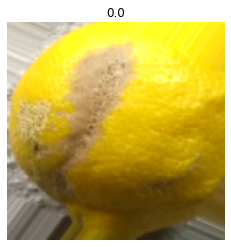

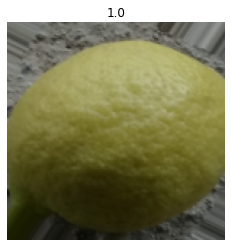

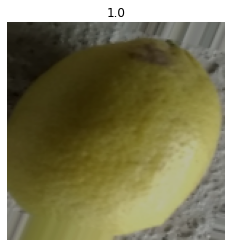

In [65]:

for i in range(6):
    img, labels = train_generator.next()
    plt.imshow(img[0])
    plt.title(labels[0])
    plt.axis('off')
    plt.show()

# data = 18
# plt.imshow(image[data])
# plt.title(label[data])
# plt.show()

# **Modeling**

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 1)                 175233    
                                                                 
Total params: 176,129
Trainable params: 176,129
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [31]:
earlyStopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
)
#EarlyStopping,ReduceLn

In [32]:
history = model.fit(
    train_generator,
    epochs=25,
    validation_data = validation_generator,
    verbose = 1,
    callbacks=[earlyStopping]
)

Epoch 1/25
23/23 [==============================] - 268s 12s/step - loss: 2.6858 - accuracy: 0.5771 - val_loss: 0.4204 - val_accuracy: 0.8193
Epoch 2/25
23/23 [==============================] - 33s 1s/step - loss: 0.5126 - accuracy: 0.7906 - val_loss: 0.2384 - val_accuracy: 0.9253
Epoch 3/25
23/23 [==============================] - 39s 2s/step - loss: 0.3724 - accuracy: 0.8457 - val_loss: 0.4574 - val_accuracy: 0.7614
Epoch 4/25
23/23 [==============================] - 36s 2s/step - loss: 0.3463 - accuracy: 0.8567 - val_loss: 0.1686 - val_accuracy: 0.9325
Epoch 5/25
23/23 [==============================] - 33s 1s/step - loss: 0.2653 - accuracy: 0.8926 - val_loss: 0.1843 - val_accuracy: 0.9590
Epoch 6/25
23/23 [==============================] - 36s 2s/step - loss: 0.2626 - accuracy: 0.8974 - val_loss: 0.1630 - val_accuracy: 0.9229
Epoch 7/25
23/23 [==============================] - 33s 1s/step - loss: 0.2099 - accuracy: 0.9187 - val_loss: 0.1597 - val_accuracy: 0.9301
Epoch 8/25
23/23 [

## **EVALUATE MODEL**

In [33]:
#train
y_acc_train = history.history['accuracy']
y_acc_val = history.history['val_accuracy']

#validation
y_loss_train = history.history['loss']
y_loss_val = history.history['val_loss']

#epoch
x_ = range(len(y_acc_train))

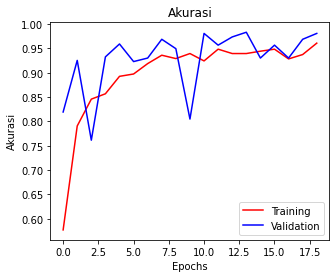

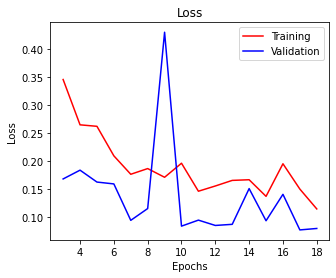

In [34]:
plt.figure(1, figsize=(5,4))
plt.plot(x_, y_acc_train, c='r', label='Training')
plt.plot(x_, y_acc_val, c='b', label='Validation')
plt.title('Akurasi')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()

plt.figure(2, figsize=(5,4))
plt.plot(x_[3:], y_loss_train[3:], c='r', label='Training')
plt.plot(x_[3:], y_loss_val[3:], c='b', label='Validation')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
model.evaluate(test_generator)

5/5 [==============================] - 130s 32s/step - loss: 0.1008 - accuracy: 0.9745


[0.10082617402076721, 0.9745222926139832]

In [36]:
result = model.predict(test_generator)
print(result)

5/5 [==============================] - 2s 424ms/step
[[5.19175716e-02]
 [9.96118069e-01]
 [9.99976754e-01]
 [9.93547797e-01]
 [2.75701821e-01]
 [1.95486933e-07]
 [6.80500580e-06]
 [7.61879422e-03]
 [9.99261737e-01]
 [9.95452404e-01]
 [5.57584804e-04]
 [2.61215519e-07]
 [9.99615073e-01]
 [9.87104416e-01]
 [9.98850465e-01]
 [2.38440742e-04]
 [4.00844485e-01]
 [9.99196649e-01]
 [4.33093248e-07]
 [9.85495806e-01]
 [9.98055160e-01]
 [9.99297380e-01]
 [3.23298037e-01]
 [4.77251350e-09]
 [9.25170600e-01]
 [9.93895888e-01]
 [2.23257943e-04]
 [2.08137017e-02]
 [9.73699272e-01]
 [9.98308241e-01]
 [9.42232251e-01]
 [2.98537500e-02]
 [9.58474398e-01]
 [9.70542550e-01]
 [9.97724771e-01]
 [9.96842325e-01]
 [8.45008437e-03]
 [9.28043604e-01]
 [1.07125531e-10]
 [9.83457446e-01]
 [9.77711976e-01]
 [9.79174733e-01]
 [1.61484088e-08]
 [2.99292515e-06]
 [3.18829319e-03]
 [2.43438443e-08]
 [5.79327382e-02]
 [6.28103327e-04]
 [9.05196369e-01]
 [9.70651567e-01]
 [3.93448399e-11]
 [9.49362099e-01]
 [5.6545633

#### Membuat Folder untuk menyimpan model

In [66]:
# %mkdir /content/drive/MyDrive/PA_KB/

#### Menyimpan Folder

In [67]:
model.save('/content/drive/MyDrive/PA_KB/Model.h5')